In [2]:
# import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from datetime import datetime

In [3]:
# instantiate an empty dataframe
tl_data = pd.DataFrame()


dtype={"dataset_id": int, "listing_id": str, "domain":str,"as_of_date":str,'title':str,
       'url':str,'brand':str,'category':str,'locality':str,'region':str,'country':str,'number_of_openings':str,
       'date_added':str,'date_updated':str,'posted_date':str,'location_string':str,
       'description':str,'entity_id':str,'city_lat':str,'city_lng':str,'cusip':str,
       'isin':str
       }

h =0 

def dte(x):
    try:
        return pd.to_datetime(x, format='%Y-%m-%d') 
    except:
        return pd.NaT
      
'''Read each file in chunks  '''
for df_temp in pd.read_csv('EngDataSc_df.csv', chunksize=500000, dtype = dtype):
  print(h)
  h=h+1
  chk = df_temp['title'].str.contains('Data|data|Analyst|Blockchain|developer|Developer|analyst|code|Code', na=False)
  df = df_temp.loc[chk ]
  df = df.reset_index(drop=True)
  #df_temp['as_of_date'] = pd.to_datetime(df_temp['as_of_date'], format='%Y-%m-%d')      
  df['posted_date'] = df['posted_date'].apply(dte)
  df['Year'] = df['posted_date'].dt.year
  df['Month'] = df['posted_date'].dt.month
  
  u_regions = df['region'].unique()
  u_yrs = df['Year'].unique()
  
  u_regions = [x for x in u_regions if x != 'nan']
                    
  u_yrs = u_yrs[~ np.isnan(u_yrs)]

  for i in u_regions:
    R=[]
    #for each region in each year in each month find the number if posts
    for y in u_yrs:
      for m in range(12):
        mont = m+1
        cnt = df[(df['Year']==y) &  (df['Month']==mont) & (df['region'] == i)   ].shape[0]
        R = [i , str(y) ,str(mont) ,str(cnt)]
        sr = pd.Series(R)
        tl_data= tl_data.append(sr,ignore_index=True)

#export_df = tl_data.to_csv('C:\\Users\\...\\TrendLine_Data.csv',index=None,header=True)


0
1
2
3
4
5


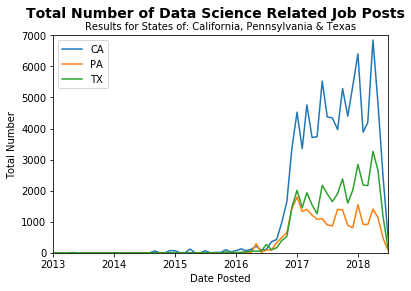

In [5]:
'''
This is the first plot
'''
#find the state of the regions and finalize the data frame
        
first_res = tl_data.copy()
first_res.columns= ['Region','Year','Month','Frequency']

get_rgs = first_res['Region'].unique()

first_res['State'] = ''

       
first_res.loc[(first_res['Region'].isin([ "CA", "California", "San Jose", "San Francisco", "Menlo Park", "Los Angeles", "California [CA]", "Brentwood", "Walnut Creek", "CA,California","Cerritos, CA","Goleta, CA", "Glendale, CA","Folsom, CA", "Goleta", "Chico, CA", "CA 90094", "CA 94107","Costa Mesa, CA", "Irvine", "Los Angeles, CA", "Irvine, CA", "McClellan, CA", "Agoura Hills", "Canoga Park", "Fremont", "Napa", "Livermore", "Menlo Park, CA", "Milpitas","Mountain View", "Newbury Park, CA", "San Diego", "San Diego County", "Palo Alto", "Sacramento", "Santa Clara", "Santa Clara, CA", "West Covina, CA", "Santa Ana, CA", "Thousand Oaks, CA", "US-CA", "San Diego, CA", "San Jose, CA", "Torrance, CA", "South San Francisco, CA","San Francisco, CA","Woodland Hills, CA", "Santa Rosa, CA", "West Hills, CA", "Rancho Cucamonga, CA", "Walnut Creek, CA","Pinole, CA","Redlands, CA", "Riverside, CA"])) , 'State']  = 'CA' 

first_res.loc[(first_res['Region'].isin([ "PA","Pennsylvania", "Lewisburg", "Warminster","Altoona", "Doylestown, PA", "Fombell, PA","Erie, PA", "Butler, PA", "Enola, PA", "Carlisle, PA", "Denver, PA", "Fort Washington, PA", "Chambersburg, PA", "Harrisburg, PA", "Latrobe, PA","Indiana or Pittsburgh", "Hermitage, PA", "Mcmurray, PA", "Boyers", "Cranberry Twp", "Canonsburg", "Glen Mills", "Greensburg", "Lansdale", "North Versailles, PA", "New Castle, PA", "Philadelphia", "Royersford", "Sharon Hill", "West Chester", "Pittsburgh", "PA,Pennsylvania", "Shamokin Dam, PA", "Pittston, PA", "Phoenixville, PA", "Pittsburgh, PA", "Pleasant Hills, PA", "Wilkes Barre", "US - PA", "Wilkes Barre, PA", "PA  Pennsylvania", "Philadelphia, PA","Willow Street, PA", "West Chester, PA", "Wayne, PA", "Willow Grove, PA", "Walnutport, PA" ] )) , 'State']  = 'PA' 

first_res.loc[(first_res['Region'].isin( [  "TX", "Texas", "Sugar Land","Austin","Fort Worth","Texas [TX]", "Dallas", "Irving", "Dallas, TX", "Fort Worth, TX", "Grand Prairie, TX","Dallas-Corporate Headquarters", "El Paso, TX", "Carrollton, TX" "Garland, TX", "Houston", "Houston, TX", "Irving, TX","IL, NC or TX", "Addison","Huntsville", "Lubbock", "Midland", "NC, IL, TX, NE, MN", "NC, IL, TX, NE", "NC, TX", "New Braunfels", "Plano", "Richardson Operations Center", "TX,Texas", "San Antonio, TX", "Plano, TX","Richardson, TX", "Sugar Land, TX", "Odessa, TX","US Texas", "TX or IL", "US - TX","Orange, TX", "Richardson", "Round Rock, TX", "Westlake, TX", "Seadrift"])) , 'State']  = 'TX' 


CPT_df = first_res[ first_res['State'].isin(['CA','PA', 'TX'  ]) ].copy()

CPT_df = CPT_df.reset_index(drop=True)


cpt_yrs = np.sort( CPT_df['Year'].unique())

CAL_df = pd.DataFrame()
PA_df = pd.DataFrame()
TX_df = pd.DataFrame()



def find_freq(st_code, pd_frm):
  for y in cpt_yrs:
      for m in range(12):
        nm = m+1
        fnd = (CPT_df.loc[((CPT_df['State'] == st_code) & (CPT_df['Year'] == str(y )) & (CPT_df['Month'] == str(nm) ))  ,   'Frequency'])
        DD = sum(int(z) for z in fnd)
        C = [str(y), str((m+1)), str(DD)]
        f = pd.Series(C)
        pd_frm= pd_frm.append(f,ignore_index=True)
  
  pd_frm.columns= ['year', 'month','Frequency']
  pd_frm['day'] = 1
  pd_frm['full_dt'] =pd.to_datetime(pd_frm[['year', 'month','day']])
  return (pd_frm)
      
      

cal_trnd = find_freq('CA', CAL_df)
pa_trnd = find_freq('PA', PA_df)
tx_trnd = find_freq('TX', TX_df)

cal_trnd['Frequency'] = pd.to_numeric(cal_trnd['Frequency'])
pa_trnd['Frequency'] = pd.to_numeric(pa_trnd['Frequency'])
tx_trnd['Frequency'] = pd.to_numeric(tx_trnd['Frequency'])

plt.plot(cal_trnd['full_dt'], cal_trnd['Frequency'], label="CA")
plt.plot(pa_trnd['full_dt'], pa_trnd['Frequency'], label="PA")
plt.plot(tx_trnd['full_dt'], tx_trnd['Frequency'], label="TX")

plt.legend(loc='upper left')

plt.title("Results for States of: California, Pennsylvania & Texas", fontsize=10)
plt.suptitle("Total Number of Data Science Related Job Posts", fontsize=14, fontweight='bold')
plt.xlabel("Date Posted")
plt.ylabel("Total Number")
plt.xlim('2013-01-01 00:00:00', '2018-07-01 00:00:00')
plt.ylim(0,7000 )
plt.show()

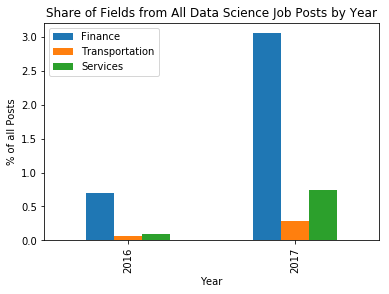

In [6]:
'''
This is the second plot
'''

## Plot the split over different domains by brand name in 2017 
  


def find_prop(yr):
  df_YY =  df[ df['Year'] == yr ]

  chk_finance = sum(df_YY['brand'].str.contains('Bank|Tax|Finance|Wealth|Management|Business|Consult|Marketing', na=False))
  chk_transport = sum(df_YY['brand'].str.contains('SCM|Transport|Logistic|Supply|Chain|E-Commerce|Truck|Ship', na=False)) 
  chk_service = sum(df_YY['brand'].str.contains('Hospitality|Human Resources|Customer|HR|Retail', na=False) )

  total_nb = df_YY.shape[0]

  prop_finance = (0.00+ chk_finance)*100/total_nb
  prop_transport =(0.00+chk_transport )*100/total_nb
  prop_service = (0.00+ chk_service )*100 /total_nb
  
  return([prop_finance,prop_transport,prop_service ])
  
x_ax = [2016,2017] 
y_13 = find_prop(2013.)
y_14 = find_prop(2014.)
y_15 = find_prop(2015.)
y_16 = find_prop(2016.)
y_17 = find_prop(2017.)

Finan = [ y_16[0], y_17[0]]
Trans = [ y_16[1], y_17[1]]
Ser =   [ y_16[2], y_17[2]]

X = ['Finance','Transportation','Services']

K = pd.DataFrame(np.c_[Finan,Trans ,Ser], index=x_ax, columns = X)
K.plot.bar()

plt.xlabel('Year')
plt.ylabel('% of all Posts')

plt.title('Share of Fields from All Data Science Job Posts by Year')
plt.show()